In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set()

#download source
#https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/

import zipfile

z = zipfile.ZipFile('COTAHIST_A2023.ZIP' , 'r')
z.extractall()
z.close()


In [2]:
features_size=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]
b3_data=pd.read_fwf('COTAHIST_A2023.TXT',widths=features_size, header=0)


In [3]:

#layout details
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf



#name set
b3_data.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

#drop last line
linha=len(b3_data["data_pregao"])
b3_data=b3_data.drop(linha-1)


listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for column in listaVirgula:
    b3_data[column]=[i/100. for i in b3_data[column]]
    
b3_data.head()

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20230102,2.0,NEOE3,10,NEOENERGIA,ON NM,NaN,R$,15.40,...,1916.0,325000.0,4902151.0,0.0,0.0,99991231.0,1.0,0.0,BRNEOEACNOR3,117.0
1,1,20230102,2.0,NEXP3,10,NEXPE,ON NM,NaN,R$,0.31,...,255.0,197700.0,58980.0,0.0,0.0,99991231.0,1.0,0.0,BRNEXPACNOR0,100.0
2,1,20230102,2.0,NGRD3,10,NEOGRID,ON NM,NaN,R$,1.48,...,1011.0,589900.0,861509.0,0.0,0.0,99991231.0,1.0,0.0,BRNGRDACNOR3,102.0
3,1,20230102,2.0,NINJ3,10,GETNINJAS,ON NM,NaN,R$,2.70,...,421.0,76000.0,207926.0,0.0,0.0,99991231.0,1.0,0.0,BRNINJACNOR5,100.0
4,1,20230102,2.0,NORD3,10,NORDON MET,ON,NaN,R$,8.48,...,17.0,2700.0,23143.0,0.0,0.0,99991231.0,1.0,0.0,BRNORDACNOR7,135.0


In [19]:
# Alguns tipos de mercado

# 10 - Mercado à vista
# 70 - Opções de Compra
# 80 - Opções de Venda

b3_data[b3_data['tipo_mercado']==10]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20230102,2.0,NEOE3,10,NEOENERGIA,ON NM,NaN,R$,15.40,...,1916.0,325000.0,4902151.0,0.0,0.0,99991231.0,1.0,0.0,BRNEOEACNOR3,117.0
1,1,20230102,2.0,NEXP3,10,NEXPE,ON NM,NaN,R$,0.31,...,255.0,197700.0,58980.0,0.0,0.0,99991231.0,1.0,0.0,BRNEXPACNOR0,100.0
2,1,20230102,2.0,NGRD3,10,NEOGRID,ON NM,NaN,R$,1.48,...,1011.0,589900.0,861509.0,0.0,0.0,99991231.0,1.0,0.0,BRNGRDACNOR3,102.0
3,1,20230102,2.0,NINJ3,10,GETNINJAS,ON NM,NaN,R$,2.70,...,421.0,76000.0,207926.0,0.0,0.0,99991231.0,1.0,0.0,BRNINJACNOR5,100.0
4,1,20230102,2.0,NORD3,10,NORDON MET,ON,NaN,R$,8.48,...,17.0,2700.0,23143.0,0.0,0.0,99991231.0,1.0,0.0,BRNORDACNOR7,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212811,1,20230825,36.0,BIYT39,10,BKR 7 10 YRT,DRE,NaN,R$,45.80,...,8.0,2120.0,97233.1,0.0,0.0,99991231.0,1.0,0.0,BRBIYTBDR000,118.0
1212812,1,20230825,36.0,BPOT39,10,GX CANNABIS,DRE,NaN,R$,15.55,...,6.0,30.0,528.4,0.0,0.0,99991231.0,1.0,0.0,BRBPOTBDR006,102.0
1212813,1,20230825,36.0,BCHI39,10,MSCI CHINA,DRE,NaN,R$,26.63,...,6.0,260.0,6927.0,0.0,0.0,99991231.0,1.0,0.0,BRBCHIBDR001,106.0
1212814,1,20230825,36.0,BCNY39,10,BKR CHINA A,DRE,NaN,R$,45.67,...,2.0,30.0,1644.4,0.0,0.0,99991231.0,1.0,0.0,BRBCNYBDR006,102.0


In [15]:
b3_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505518 entries, 0 to 1505517
Data columns (total 26 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   tipo_registro                 1505518 non-null  int64  
 1   data_pregao                   1505518 non-null  object 
 2   cod_bdi                       1505518 non-null  float64
 3   cod_negociacao                1505518 non-null  object 
 4   tipo_mercado                  1505518 non-null  int64  
 5   noma_empresa                  1505518 non-null  object 
 6   especificacao_papel           1505518 non-null  object 
 7   prazo_dias_merc_termo         1233877 non-null  float64
 8   moeda_referencia              1505518 non-null  object 
 9   preco_abertura                1505518 non-null  float64
 10  preco_maximo                  1505518 non-null  float64
 11  preco_minimo                  1505518 non-null  float64
 12  preco_medio                 

In [26]:
b3_data[b3_data['cod_negociacao']=='ABEVJ178']

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
1475017,1,20230821,78.0,ABEVJ178,70,ABEV,ON,0.0,R$,0.03,...,2.0,100000.0,3000.0,17.82,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0
1481321,1,20230822,78.0,ABEVJ178,70,ABEV,ON,0.0,R$,0.01,...,104.0,201100.0,4013.0,17.82,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0
1487425,1,20230823,78.0,ABEVJ178,70,ABEV,ON,0.0,R$,0.03,...,1.0,100.0,3.0,17.82,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0
1493820,1,20230824,78.0,ABEVJ178,70,ABEV,ON,0.0,R$,0.03,...,1.0,500.0,15.0,17.82,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0
1499747,1,20230825,78.0,ABEVJ178,70,ABEV,ON,0.0,R$,0.03,...,3.0,4200.0,126.0,17.82,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0


In [21]:
b3_data[ (b3_data['tipo_mercado']==80) & (b3_data['cod_negociacao']=='ABEVT200')]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
1381852,1,20230803,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.26,...,3.0,600.0,1954.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1388763,1,20230804,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.15,...,1.0,700.0,2205.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1395558,1,20230807,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.31,...,2.0,400.0,1322.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1402581,1,20230808,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.34,...,1.0,100.0,334.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1409882,1,20230809,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.46,...,1.0,500.0,1730.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1417332,1,20230810,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.40,...,1.0,200.0,680.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1424634,1,20230811,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.48,...,2.0,300.0,1040.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1432547,1,20230814,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.51,...,5.0,3300.0,11452.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1441136,1,20230815,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.48,...,1.0,500.0,1740.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
1459306,1,20230817,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.51,...,1.0,200.0,702.0,20.0,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0


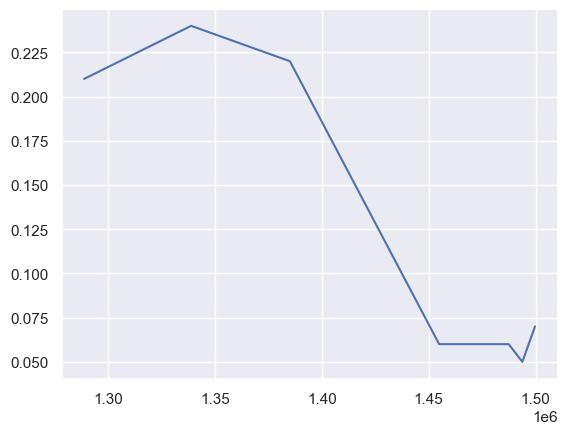

In [39]:
%matplotlib inline
(b3_data[ b3_data['cod_negociacao']=='ABEVJ163']['preco_ultimo_negocio']).plot();

In [41]:
#@markdown teste
r = 0.01
S = 15
k = 17
T = 240/365
sigma= 0.3
from scipy.stats import norm

def blackScholes(r, S, k, T, sigma, type="C"):
    
    d1=(np.log(S/k)+ (r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1- sigma*np.sqrt(T)

    if type=="C":
            price= S*norm.cdf(d1,0,1) - k*np.exp(-r*T)*norm.cdf(d2,0,1) #accumlative distribution function
            print("Call calculated")
    elif type =="P":
            price = k*np.exp(-r*T)*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
            print("Put calculated")
    return price

        

print("Black Shcoles Working:", round(blackScholes(r, S, k, T, sigma, type="C"),2))

print("Black Shcoles Working:", round(blackScholes(r, S, k, T, sigma, type="P"),2))

Call calculated
Black Shcoles Working: 0.78
Put calculated
Black Shcoles Working: 2.67
